In [1]:
#import necccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model


In [8]:
# Define the directories where the images are located
train_dir = '/kaggle/input/fer2013/train'  # Path to the training dataset directory
test_dir = '/kaggle/input/fer2013/test'    # Path to the testing dataset directory

# Create ImageDataGenerators for loading and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image data to values between 0 and 1
    rotation_range=30,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly shear the images
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),  # Image size
    batch_size=64,  # Batch size
    color_mode='grayscale',  # The images are in grayscale
    class_mode='categorical'  # Use categorical labels (7 emotions)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
#This model was based on a paper in IEEE called Ensemble CNN, which has 
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))  # 1 channel for grayscale images
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer (7 classes for 7 emotions)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,713,927 (6.54 MB)

 Trainable params: 1,713,927 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,  # You can change the number of epochs based on your needs
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 187s 409ms/step - accuracy: 0.2339 - loss: 1.8398 - val_accuracy: 0.2633 - val_loss: 1.7638
Epoch 2/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 88us/step - accuracy: 0.2812 - loss: 1.8485 - val_accuracy: 0.2000 - val_loss: 1.7033
Epoch 3/20


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 115s 255ms/step - accuracy: 0.2539 - loss: 1.7854 - val_accuracy: 0.2757 - val_loss: 1.7410
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.2656 - loss: 1.7286 - val_accuracy: 0.1000 - val_loss: 1.8213
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 114s 252ms/step - accuracy: 0.2619 - loss: 1.7705 - val_accuracy: 0.2902 - val_loss: 1.7148
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.3281 - loss: 1.7093 - val_accuracy: 0.1000 - val_loss: 1.7331
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.2740 - loss: 1.7627 - val_accuracy: 0.3033 - val_loss: 1.6998
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 0.2656 - loss: 1.7665 - val_accuracy: 0.2000 - val_loss: 1.6486
Epoch 9/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 117s 259ms/step - accuracy: 0.2773 - loss: 1.7404 - val_accuracy: 0.3316 - val_loss: 1.6590
Epoch 10/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.3438 - loss: 1.6960 - val_ac

In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.n // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')


112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.4275 - loss: 1.4910
Test accuracy: 0.4292689859867096


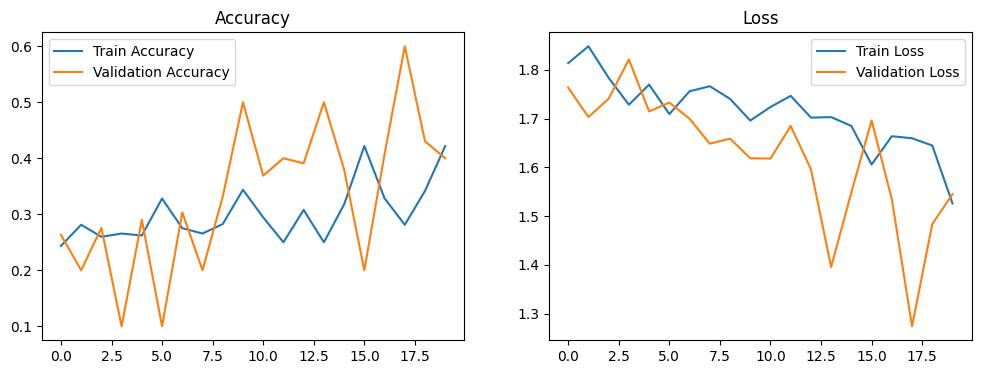

In [12]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
